# LAT Data Latency History

#### Including trending of outliers: long-timescales

In [1]:
from astropy.table import Table, Column
import numpy as np
import matplotlib.pyplot as plt
#import pandas as pd
%matplotlib inline
#plt.figure(figsize = [12, 10])
plt.rc('font', size = 20)
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

In [2]:
# read regular ASCII tabular files of data

file = "/Users/rac/Documents/GLAST/ISOC/LATmetrics/latency/2017/times.20180418"
f = Table.read(file, format = 'ascii')
y = f['col1'] # - 2000
slact = f['col2']
nasat = f['col3']
tott = f['col4']

In [3]:
%%script false
file = "/Users/rac/Documents/GLAST/ISOC/LATmetrics/latency/2016/sm1000.slac.20161026"
f = Table.read(file, format = 'ascii')
ysm = f['col1'] - 2000
p0  = f['col2']
p5  = f['col3']
p50 = f['col4']
p95 = f['col5']
p98 = f['col6']
p99 = f['col7']
p100 = f['col8']

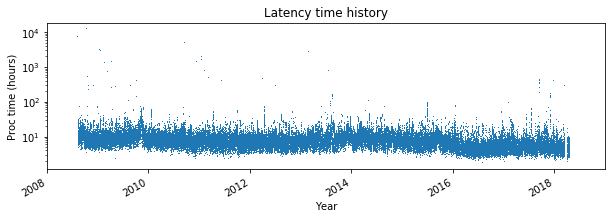

In [4]:
fig = plt.figure(figsize = [10, 3])
ax = fig.add_subplot(111)
ax.set_xlim(2008,2019)
ax.plot(y, tott, ',')
plt.xlabel("Year")
plt.ylabel("Proc time (hours)")
plt.title("Latency time history")
plt.yscale('log')
#ax.plot(ysm,p50,'-r')
#ax.plot(ysm,p5,'-r')
#ax.plot(ysm,p95,'-r')
#ax.plot(ysm,p98,'-g')
#ax.plot(ysm,p99,'-v')
plt.gcf().autofmt_xdate()
plt.show()

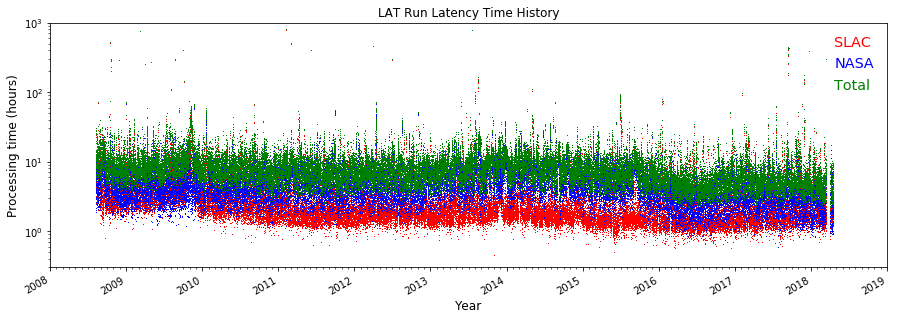

In [8]:
majorLocator = MultipleLocator(1)
#majorFormatter = FormatStrFormatter('%d')
minorLocator = AutoMinorLocator(12)

def color_legend_texts(leg):
    """Color legend texts based on color of corresponding lines"""
    for line, txt in zip(leg.get_lines(), leg.get_texts()):
        txt.set_color(line.get_color())  

fig = plt.figure(figsize = [15, 5])
ax = fig.add_subplot(111)
ax.set_xlim(2008,2019)
ax.set_ylim(.3,1000)
ax.xaxis.set_major_locator(majorLocator)
ax.xaxis.set_minor_locator(minorLocator)
ax.plot(y, slact, ',',color='r',label='SLAC')
ax.plot(y, nasat, ',', color='b',label='NASA')
ax.plot(y, tott, ',',color='g',label='Total')
#ax.minorticks_on()
plt.xlabel("Year",fontsize='large')
plt.ylabel("Processing time (hours)",fontsize='large')
plt.title("LAT Run Latency Time History")
plt.yscale('log')
plt.gcf().autofmt_xdate()
legend = ax.legend(loc='upper right', fontsize='x-large', markerscale = 0,frameon = 0)
color_legend_texts(legend)

plt.show()

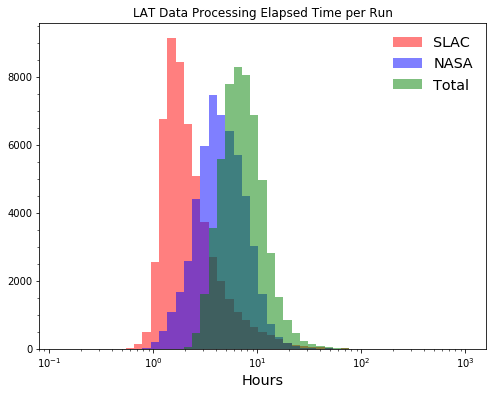

In [56]:
minorLocator = AutoMinorLocator(4)

fig = plt.figure(figsize = [8,6])
ax = fig.add_subplot(111)
binarr = 10**(np.linspace(-30,100)*0.03)
ax.yaxis.set_minor_locator(minorLocator)
ax.hist(slact,color='r',label='SLAC',bins=binarr,alpha=0.5)
ax.hist(nasat, color='b',label='NASA',bins=binarr,alpha=0.5)
ax.hist(tott,color='g',label='Total',bins=binarr,alpha=0.5)
#ax.minorticks_on()
plt.xlabel("Hours",fontsize='x-large')
#plt.ylabel("Processing time (hours)",fontsize='large')
plt.title("LAT Data Processing Elapsed Time per Run")
plt.xscale('log')
#plt.gcf().autofmt_xdate()
legend = ax.legend(loc='upper right', fontsize='x-large',frameon = 0)

plt.show()

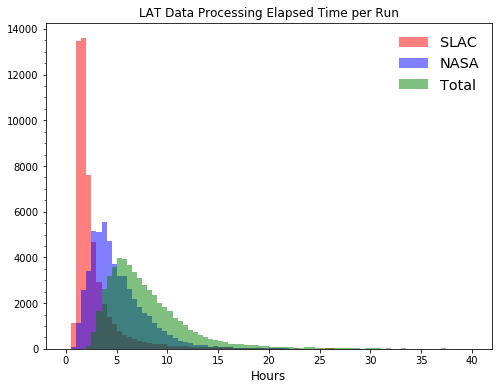

In [55]:
minorLocator = AutoMinorLocator(4)

fig = plt.figure(figsize = [8,6])
ax = fig.add_subplot(111)
#ax.xaxis.set_minor_locator(minorLocator)
ax.yaxis.set_minor_locator(minorLocator)
ax.hist(slact,color='r',label='SLAC',range = (0,40),bins=80,alpha=0.5)
ax.hist(nasat, color='b',label='NASA',range = (0,40),bins=80,alpha=0.5)
ax.hist(tott,color='g',label='Total',range = (0,40),bins=80,alpha=0.5)
#ax.minorticks_on()
plt.xlabel("Hours",fontsize='large')
#plt.ylabel("Processing time (hours)",fontsize='large')
plt.title("LAT Data Processing Elapsed Time per Run")
#plt.gcf().autofmt_xdate()
legend = ax.legend(loc='upper right', fontsize='x-large', markerscale = 0.1,frameon = 0)

plt.show()